In [ ]:
import tensorflow as tf
import numpy as np
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from tensorflow.python import debug as tf_debug
import seaborn as sns
import pandas as pd

In [10]:
writer = tf.summary.FileWriter('.')
writer.add_graph(tf.get_default_graph())

In [34]:
features = {
    'sales' : [[5], [10], [8], [9], [2]],
    'expense' : [[2], [1], [3], [4], [1]],
    'department': ['sports', 'sports', 'gardening', 'gardening','other']}
department_column = tf.feature_column.categorical_column_with_vocabulary_list(
        'department', ['sports', 'gardening','other'])
department_column = tf.feature_column.indicator_column(department_column)

columns = [
    tf.feature_column.numeric_column('sales'),
    tf.feature_column.numeric_column('expense'),
    department_column
]
inputs = tf.feature_column.input_layer(features, columns)

In [ ]:
n_feature = 5
x_value = np.random.rand(1000,n_feature)
y_true_value = np.random.rand(m_examples, 1)
loss_df = pd.DataFrame(columns=['x','y'])

In [ ]:
x_value, y_true_value

In [180]:
x_in = tf.placeholder(dtype=tf.float32, shape=[None,n_feature], name='x_in')
y_pred = tf.placeholder(dtype=tf.float32,name='y_pred')

In [205]:
linear_model = tf.layers.Dense(units=1)
y_pred = linear_model(x_in)
sess = tf.Session()
sess.run(init)
loss = tf.losses.mean_squared_error(labels=y_true_value, predictions=y_pred)
optimizer = tf.train.GradientDescentOptimizer(0.00001)
train = optimizer.minimize(loss)

In [206]:
for i in range(100):
    sess.run(tf.global_variables_initializer())
    _,loss_value = sess.run([train, loss],feed_dict={x_in : x_value})
    loss_df = loss_df.append({'x':i,'y':loss_value},ignore_index=True)
    

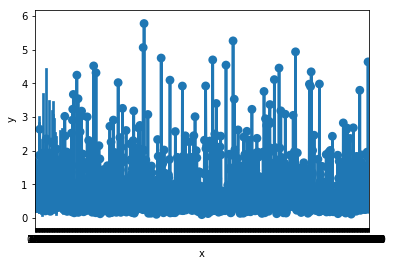

In [208]:
plot = sns.pointplot(x='x',y='y',data=loss_df)

In [166]:
print(sess.run(linear_model.weights))

[array([[ 0.26139826],
       [-0.17175926],
       [-0.5929877 ],
       [ 0.35682765],
       [-0.14855205]], dtype=float32), array([0.00128046], dtype=float32)]


In [89]:
sess.run(y_pred).round()

array([[-0.],
       [-1.],
       [-2.],
       [-3.]], dtype=float32)

In [90]:
print(sess.run(linear_model.weights))

[array([[-0.999996]], dtype=float32), array([0.99998856], dtype=float32)]


In [57]:
sess.run(x)

array([[1., 1.],
       [2., 2.],
       [3., 3.],
       [4., 4.]], dtype=float32)

In [113]:
# build a simple linear regression
# generate test data
m_examples = 1000
n_features = 4
x_true = np.random.rand(m_examples, n_features)
y_true = np.random.rand(m_examples, 1)

# design computation graph for liner regression
x_in = tf.placeholder(dtype=tf.float32,shape=[None,n_features],name='x_feature')
y_in = tf.placeholder(dtype=tf.float32,shape=[None,1],name='y_in')
W = tf.Variable(tf.random_normal([n_features, 1]),name='W')
b = tf.Variable(tf.constant(0.1, shape=[]), name="b")
h = tf.add(tf.matmul(x_in, W), b)

# cost function 
loss = tf.losses.mean_squared_error(labels=y_true, predictions=h)
optimizer = tf.train.GradientDescentOptimizer(0.1)
train_op = optimizer.minimize(loss)

In [114]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for batch in range(1000):
        sess.run(train_op, feed_dict={
            x_in: x_true,
            y_in: y_true
        })
    w_computed = sess.run(W)
    b_computed = sess.run(b)

In [115]:
print("w computed [%s]" % ', '.join(['%.5f' % x for x in w_computed.flatten()]))
#print("w actual   [%s]" % ', '.join(['%.5f' % x for x in w_true.flatten()]))
print("b computed %.3f" % b_computed)
#print("b actual  %.3f" % b_true[0])

w computed [0.01427, -0.02247, 0.01658, -0.00794]
b computed 0.520


In [21]:
for i in range(10000):
  _, loss_value = sess.run((train, loss))
  print(loss_value)

NameError: name 'train' is not defined

In [255]:
loss = tf.losses.mean_squared_error(labels=y_true, predictions=y_pred)

In [257]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

ValueError: No gradients provided for any variable, check your graph for ops that do not support gradients, between variables ["<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32_ref>", "<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_1/kernel:0' shape=(4, 1) dtype=float32_ref>", "<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32_ref>", "<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_3/kernel:0' shape=(1, 1) dtype=float32_ref>", "<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32_ref>", "<tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_5/kernel:0' shape=(4, 1) dtype=float32_ref>", "<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_6/kernel:0' shape=(1, 1) dtype=float32_ref>", "<tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_7/kernel:0' shape=(4, 1) dtype=float32_ref>", "<tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_8/kernel:0' shape=(4, 2) dtype=float32_ref>", "<tf.Variable 'dense_8/bias:0' shape=(2,) dtype=float32_ref>", "<tf.Variable 'dense_9/kernel:0' shape=(4, 15) dtype=float32_ref>", "<tf.Variable 'dense_9/bias:0' shape=(15,) dtype=float32_ref>", "<tf.Variable 'dense_10/kernel:0' shape=(4, 1) dtype=float32_ref>", "<tf.Variable 'dense_10/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_11/kernel:0' shape=(4, 1) dtype=float32_ref>", "<tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_12/kernel:0' shape=(4, 1) dtype=float32_ref>", "<tf.Variable 'dense_12/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_13/kernel:0' shape=(4, 1) dtype=float32_ref>", "<tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_14/kernel:0' shape=(1, 1) dtype=float32_ref>", "<tf.Variable 'dense_14/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_15/kernel:0' shape=(1, 1) dtype=float32_ref>", "<tf.Variable 'dense_16/kernel:0' shape=(1, 2) dtype=float32_ref>", "<tf.Variable 'dense_17/kernel:0' shape=(1, 1) dtype=float32_ref>", "<tf.Variable 'dense_17/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_18/kernel:0' shape=(1, 1) dtype=float32_ref>", "<tf.Variable 'dense_18/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_19/kernel:0' shape=(1, 1) dtype=float32_ref>", "<tf.Variable 'dense_19/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_20/kernel:0' shape=(2, 1) dtype=float32_ref>", "<tf.Variable 'dense_20/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_21/kernel:0' shape=(4, 1) dtype=float32_ref>", "<tf.Variable 'dense_21/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_22/kernel:0' shape=(4, 1) dtype=float32_ref>", "<tf.Variable 'dense_22/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_23/kernel:0' shape=(4, 1) dtype=float32_ref>", "<tf.Variable 'dense_23/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_24/kernel:0' shape=(4, 1) dtype=float32_ref>", "<tf.Variable 'dense_24/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_25/kernel:0' shape=(4, 1) dtype=float32_ref>", "<tf.Variable 'dense_25/bias:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'dense_26/kernel:0' shape=(4, 1) dtype=int32_ref>", "<tf.Variable 'dense_26/bias:0' shape=(1,) dtype=int32_ref>", "<tf.Variable 'dense_27/kernel:0' shape=(4, 1) dtype=int32_ref>", "<tf.Variable 'dense_27/bias:0' shape=(1,) dtype=int32_ref>", "<tf.Variable 'dense_28/kernel:0' shape=(4, 1) dtype=int32_ref>", "<tf.Variable 'dense_28/bias:0' shape=(1,) dtype=int32_ref>"] and loss Tensor("mean_squared_error_19/value:0", shape=(), dtype=float32).

In [243]:
for i in range(10000):
  _, loss_value = sess.run((train, loss))
  print(loss_value)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_16' with dtype float and shape [?,4]
	 [[Node: Placeholder_16 = Placeholder[dtype=DT_FLOAT, shape=[?,4], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_16', defined at:
  File "/usr/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-235-ffa589d790eb>", line 1, in <module>
    x = tf.placeholder(tf.float32, shape=[None, 4])
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/tensorflow/python/ops/array_ops.py", line 1680, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3141, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/home/ubuntu/jupyter/remote_jupyter/lib/python3.4/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_16' with dtype float and shape [?,4]
	 [[Node: Placeholder_16 = Placeholder[dtype=DT_FLOAT, shape=[?,4], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
